# Итоговая работа по курсу «Python и математика для анализа данных»

Проектная работа по модулю “Математика и статистика в Python”

1.Загрузить файл hr.csv.

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

4.Визуализировать несколько взаимосвязей между переменными.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6.Рассчитать сколько работников работает в каждом департаменте.

7.Показать распределение сотрудников по зарплатам.

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

9.Сколько сотрудников покинули компанию.

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy import stats

Загружаем файл hr.csv.
* **satisfaction_level** уровень удовлетворенности сотрудника, аналог NPS
* **last_evaluation** оценка сотрудника, например, в ходе аттестации (уточнять у владельца датасета)
* **number_project** количество проектов в которых задействован сотрудник
* **average_montly_hours** среднее количество рабочих часов в месяц у сотрудника 
* **time_spend_company** сколько лет сотрудник работает в компании
* **Work_accident** несчатные случаи на работе 
* **left** сотрудник покинул компанию (1- да, 0 - нет)
* **promotion_last_5years** повышения сотрудника за последние 5 лет (1 - да, 0 - нет) 
* **sales** департамент, к которому относится сотрудник
* **salary** категория зарплаты сотрудника (low, medium, hight)

In [2]:
df=pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Добавим класс 'salary_rate' на основе 'salary' значений.

* 'low' - 0
* 'medium' - 1
* ' high' - 2

In [4]:
df['salary_rate'] = df['salary']
df.loc[df['salary'] == 'low', 'salary_rate'] = 0
df.loc[df['salary'] == 'medium', 'salary_rate'] = 1
df.loc[df['salary'] == 'high', 'salary_rate'] = 2

In [5]:
del df['salary']
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary_rate
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [6]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Добавим класс 'department' на основе 'sales' значений.
* 0 - 'sales',
* 1 - 'accounting',
* 2 - 'hr',
* 3 - 'technical', 
* 4 - 'support',
* 5 - 'management',
* 6 - 'IT',
* 7 - 'product_mng',
* 8 - 'marketing', 

In [7]:
df['department'] = df['sales']
df.loc[df['sales'] == 'sales', 'department'] = 0
df.loc[df['sales'] == 'accounting', 'department'] = 1
df.loc[df['sales'] == 'hr', 'department'] = 2
df.loc[df['sales'] == 'technical', 'department'] = 3
df.loc[df['sales'] == 'support', 'department'] = 4
df.loc[df['sales'] == 'management', 'department'] = 5
df.loc[df['sales'] == 'IT', 'department'] = 6
df.loc[df['sales'] == 'product_mng', 'department'] = 7
df.loc[df['sales'] == 'marketing', 'department'] = 8
df.loc[df['sales'] == 'RandD', 'department'] = 9

In [8]:
del df['sales']
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_rate,department
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0
2,0.11,0.88,7,272,4,0,1,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


**2. Рассчитаем основные статистики для переменных satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
salary_rate              14999 non-null int64
department               14999 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_rate,department
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706,3.339823
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183,2.820837
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000,6.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000,9.000000


Визуализируем данные. 

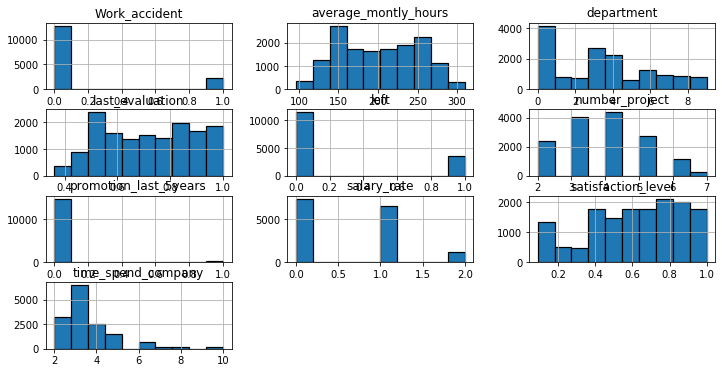

In [11]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [12]:
headers = list(df.columns.values)

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

C:\Users\admin\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0,-1.0,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0,0.0,-1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0,0.0,-1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0,-1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0,-1.0,-1.0


In [14]:
df_norm.columns = headers
df_norm.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_rate,department
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0,-1.0,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0,0.0,-1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0,0.0,-1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0,-1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0,-1.0,-1.0


In [15]:
    for k, v in df.items():
    # считаем точки в квантиле 25% от медианы
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        # выбросы находятся за этими точками
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Выбросы колонки %s = %.2f%%" % (k, perc))

Выбросы колонки satisfaction_level = 0.00%
Выбросы колонки last_evaluation = 0.00%
Выбросы колонки number_project = 0.00%
Выбросы колонки average_montly_hours = 0.00%
Выбросы колонки time_spend_company = 8.55%
Выбросы колонки Work_accident = 100.00%
Выбросы колонки left = 100.00%
Выбросы колонки promotion_last_5years = 100.00%
Выбросы колонки salary_rate = 0.00%
Выбросы колонки department = 0.00%


In [16]:
print(np.shape(df))
df = df[~(df['time_spend_company'] >= 10.0)]
print(np.shape(df))

(14999, 10)
(14785, 10)


In [17]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_rate,department
count,14785.000000,14785.000000,14785.000000,14785.000000,14785.000000,14785.000000,14785.000000,14785.000000,14785.000000,14785.000000
mean,0.612218,0.715879,3.804802,201.076767,3.404126,0.143321,0.241529,0.020494,0.588299,3.337707
std,0.249002,0.171353,1.236416,49.979197,1.241812,0.350412,0.428024,0.141687,0.633170,2.824536
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000,6.000000
max,1.000000,1.000000,7.000000,310.000000,8.000000,1.000000,1.000000,1.000000,2.000000,9.000000


In [18]:
print('Значение моды для satisfaction_level:', statistics.mode(df['satisfaction_level']))

Значение моды для satisfaction_level: 0.1


In [19]:
print('Значение моды для last_evaluation:', statistics.mode(df['last_evaluation']))

Значение моды для last_evaluation: 0.55


In [20]:
print('Значение моды для number_project:', statistics.mode(df['number_project']))

Значение моды для number_project: 4


In [21]:
from collections import Counter
c = Counter(df['average_montly_hours'])
print('Значение моды для average_montly_hours:', c.most_common(1))

Значение моды для average_montly_hours: [(156, 153)]


In [22]:
print('Значение моды для time_spend_company:', statistics.mode(df['time_spend_company']))

Значение моды для time_spend_company: 3


**3. Рассчитаем и визуализируем корреляционную матрицу для переменных**

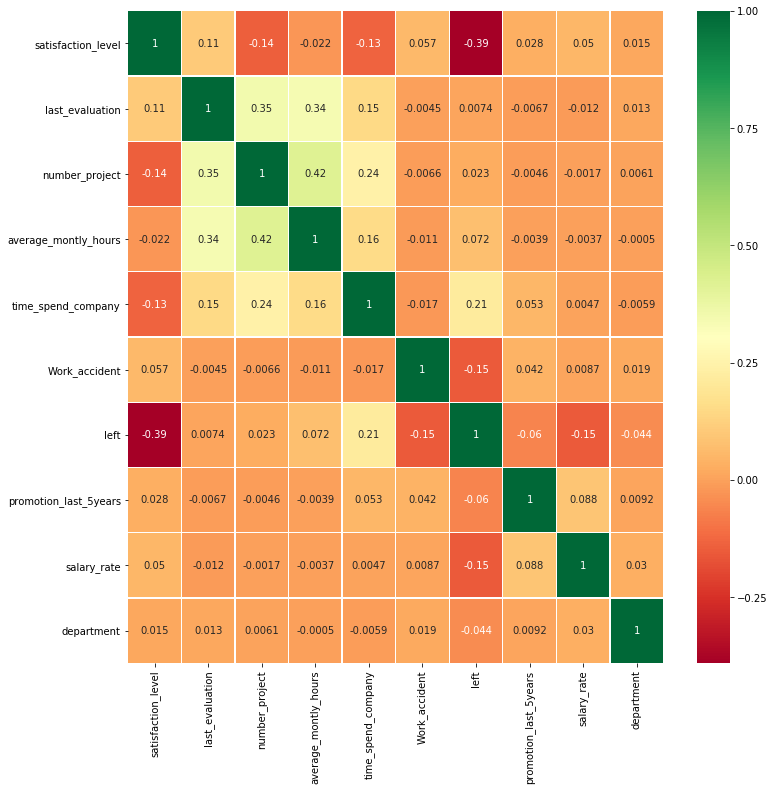

['number_project', 'average_montly_hours', 'left']


In [23]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()
# создаем матрицу корреляций
corr_matrix = df.corr().abs()
# Выбираем верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Ищем индексы колонок с корреляцией большей чем 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.3)]
print(to_drop)

Чем коэффициент ближе к 0, тем более независимы переменные. Согласно матрице корреляции, зависимость прослеживается между:
* количество проектов (number_project) и последним повышением (last_evaluation) = 0,35;
* средним количеством отработанных часов в месяц (average_montly_hours) и последним повышением (last_evaluation) = 0,34;
* средним количеством отработанных часов в месяц (average_montly_hours) и количество проектов (number_project) = 0,42;
* уровнем удовлетворенности (satisfaction_level) и уходом из компании (left) = -0,39. 

**4. Визуализируем несколько взаимосвязей между переменными.** 

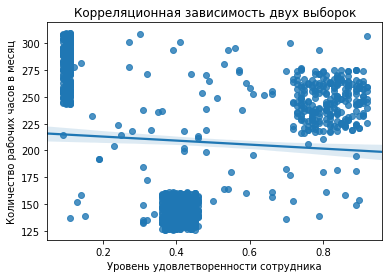

In [24]:
satisfaction_level_v = df['satisfaction_level'].head(1000)
average_montly_hours_v= df['average_montly_hours'].head(1000)
sns.regplot(x= satisfaction_level_v, y=average_montly_hours_v,data=df, fit_reg=True)
plt.xlabel('Уровень удовлетворенности сотрудника')
plt.ylabel('Количество рабочих часов в месяц')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

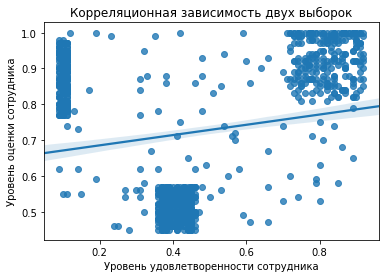

In [25]:
satisfaction_level_v = df['satisfaction_level'].head(1000)
last_evaluation_v= df['last_evaluation'].head(1000)
sns.regplot(x= satisfaction_level_v, y=last_evaluation_v,data=df, fit_reg=True)
plt.xlabel('Уровень удовлетворенности сотрудника')
plt.ylabel('Уровень оценки сотрудника')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

**5.С использованием t-test статистики t-Критерий Стьюдента проверим взаимосвязь между несколькими переменными.**

Проверим взаимосвязь выборки уровень удовлетворенности сотрудников которые работают и теми, кто покинул компанию.
T-значение - это вероятность того, что различия между выборками также означают разные значения в выборках. **Чем выше t, тем более различны группы между собой.** Чем меньше t, тем более похожи группы и результаты повторятся.
p-значение — это вероятность получить результаты, схожие по значимости с наблюдаемыми в исследовании. **Статистически значимым** (и позволяющим отвергнуть нулевую гипотезу)при этом считается результат, р-значение которого равно уровню значимости или меньше его. Это, как правило, обозначается следующим образом: p ≤ 0,05.

In [26]:
satisfaction_level_working_staff = df[df['left']==0]['satisfaction_level']

satisfaction_level_not_working_staff = df[df['left']==1]['satisfaction_level']

stats.ttest_ind(satisfaction_level_working_staff, satisfaction_level_not_working_staff)

Ttest_indResult(statistic=51.50926511655082, pvalue=0.0)

In [27]:
len(df[df['left']==0]['satisfaction_level']), len(df[df['left']==1]['satisfaction_level'])

(11214, 3571)

In [28]:
satisfaction_level_v0=df[df['left']==0]['satisfaction_level'].sample(n=1000, replace=True)
satisfaction_level_v1=df[df['left']==1]['satisfaction_level'].sample(n=1000, replace=True)

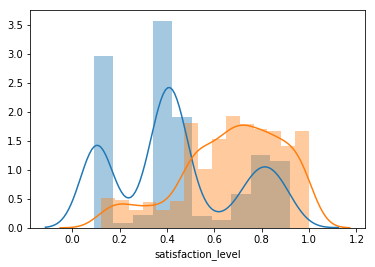

In [29]:
sns.distplot(satisfaction_level_v1)
sns.distplot(satisfaction_level_v0)

**T-значение 51.61, p-value равно 0.**
Имеется статистическое различие между выборками по удовлетворенности сотрудников перед уходом. 

In [30]:
satisfaction_level_working_staff = df[df['left']==0]['last_evaluation']

satisfaction_level_not_working_staff = df[df['left']==1]['last_evaluation']

stats.ttest_ind(satisfaction_level_working_staff, satisfaction_level_not_working_staff)

Ttest_indResult(statistic=-0.8944234135953808, pvalue=0.3711099514036056)

In [31]:
last_evaluation_v0=df[df['left']==0]['last_evaluation'].sample(n=1000, replace=True)
last_evaluation_v1=df[df['left']==1]['last_evaluation'].sample(n=1000, replace=True)

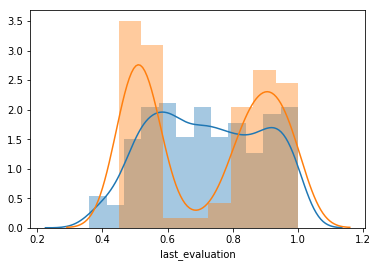

In [32]:
sns.distplot(last_evaluation_v0)
sns.distplot(last_evaluation_v1)

In [33]:
stats.ttest_ind(last_evaluation_v0, last_evaluation_v1)

Ttest_indResult(statistic=0.0837460520084144, pvalue=0.9332667309732111)

**T-значение 1.017, p-value равно 0.3**
Имеется статистическое различие между выборками по оценке сотрудников перед уходом и работающих на данный момент. 

**6. Рассчитаем сколько работников работает в каждом департаменте.**
* 0 - 'sales',
* 1 - 'accounting',
* 2 - 'hr',
* 3 - 'technical', 
* 4 - 'support',
* 5 - 'management',
* 6 - 'IT',
* 7 - 'product_mng',
* 8 - 'marketing', 

In [34]:
df_sales=df['department'].value_counts()
print(df_sales)

0    4082
3    2700
4    2203
6    1211
7     892
8     846
9     787
1     757
2     739
5     568
Name: department, dtype: int64


**7.Покажем распределение сотрудников по зарплатам.**
**salary_rate**:
* 'low' - 0,
* 'medium' - 1,
* ' high' - 2.

In [35]:
df_salary=df['salary_rate'].value_counts()
print(df_salary)

0    7260
1    6352
2    1173
Name: salary_rate, dtype: int64


**8.Покажем распределение сотрудников по зарплатам совместно с департаментами.**

In [36]:
df_salary_by_sales=df.groupby(['salary_rate', 'department']).count()[['satisfaction_level']]
df_salary_by_sales.columns = ['number']
df_salary_by_sales


number
salary_rate department        
0           0             2083
            1              356
            2              335
            3             1360
            4             1132
            5              176
            6              607
            7              449
            8              398
            9              364
1           0             1738
            1              327
            2              359
            3             1141
            4              932
            5              215
            6              521
            7              377
            8              370
            9              372
2           0              261
            1               74
            2               45
            3              199
            4              139
            5              177
            6               83
            7               66
            8               78
            9               51

Где **department**
0 - 'sales',
1 - 'accounting',
2 - 'hr',
3 - 'technical', 
4 - 'support',
5 - 'management',
6 - 'IT',
7 - 'product_mng',
8 - 'marketing'.

И где **salary_rate**:
'low' - 0,
'medium' - 1,
' high' - 2.

**9.Рассчитаем сколько сотрудников покинули компанию**

In [37]:
df_left=df[ df['left'] == 1 ]['left'].count()
print('Компанию покинуло', df_left, 'человек')

Компанию покинуло 3571 человек


**10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

**Гипотеза 1. Сотрудники покидают компанию из-за высокой загрузки.**
Предположим, что у уволенных сотрудников ('left'==1) была большая назрузка (average_montly_hours). Сравним ее с генеральной совокупностью. Нулевая гипотеза - что увольнения не связана с нагрузкой. Т.о. выборки average_montly_hours для сотрудников покинувших компанию и всех сотрудников одинаковы. Нагрузка не влияет на уход сотрудников из компании. 

In [38]:
average_montly_hours_for_left = df[df['left']==1]['average_montly_hours']
stats.ttest_1samp(average_montly_hours_for_left, df['average_montly_hours'].mean())

Ttest_1sampResult(statistic=6.192700087451381, pvalue=6.585707600996539e-10)

T-значение 6.21 и в одновыборочном критерии мы оцениваем p-value.
p-value намного меньше стандартной альфа ошибки 0.05. Не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между загрузкой уволенных сотрудников и генеральной совокупностью. Регулируя нагрузку, можно повлиять на снижение количества увольняющихся сотрудников.

In [39]:
len(df[df['left']==1]['average_montly_hours']), len(df['average_montly_hours'])

(3571, 14785)

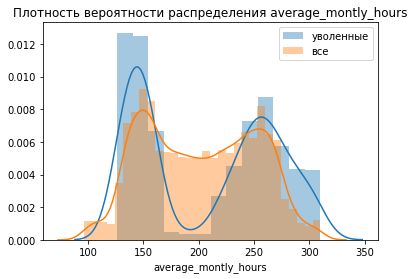

In [40]:
average_montly_hours_v1 = df[df['left']==1]['average_montly_hours']
average_montly_hours_v = df['average_montly_hours']
sns.distplot(average_montly_hours_v1)
sns.distplot(average_montly_hours_v)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['уволенные', 'все'])
plt.show()

**Гипотеза 2. Сотрудники покидают компанию из-за зарплаты.**
Предположим, что у уволенных сотрудников ('left'==1) были зарплата отличается от работающих сотрудников. Нулевая гипотеза - что увольнения не связаны с зарплатой. Т.о. выборки salary_rate для сотрудников покинувших компанию и работающих сотрудников будут одинаковы. 

In [41]:
salary_0 = df[df['salary_rate']==0]['left']
salary_1 = df[df['salary_rate']==1]['left']
salary_2 = df[df['salary_rate']==2]['left']
stats.f_oneway(salary_0, salary_1, salary_2)

F_onewayResult(statistic=184.88848282838154, pvalue=4.9184510750472925e-80)

p-value меньше стандартной альфа ошибки 0.05. Не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между зарплатами сотрудников.